Intercept: 60.70645475186507
Slope: 0.10768731754784296
MAE : 9.703211157963024
MSE : 117.73090338035513
RMSE: 10.850387245640366


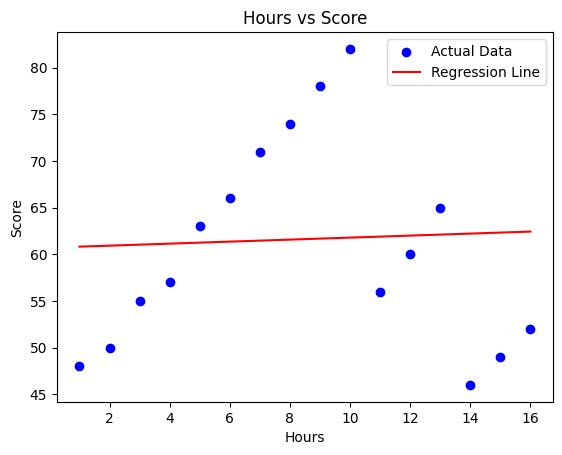

In [10]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

df = pd.read_csv("Slip1.csv")

X = df[["hours"]]
y = df["score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = LinearRegression().fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Intercept:", model.intercept_)      
print("Slope:", model.coef_[0])           
print("MAE :", mean_absolute_error(y_test, y_pred))   
print("MSE :", mean_squared_error(y_test, y_pred))    
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(df["hours"], df["score"], color="blue", label="Actual Data")

plt.plot(df["hours"], model.predict(df[["hours"]]), color="red", label="Regression Line")

plt.xlabel("Hours")
plt.ylabel("Score")
plt.title("Hours vs Score")
plt.legend()
plt.show()

Estimated Coefficients:
b0 (Intercept): 0.838709677419355
b1 (Slope): 1.2889200561009817


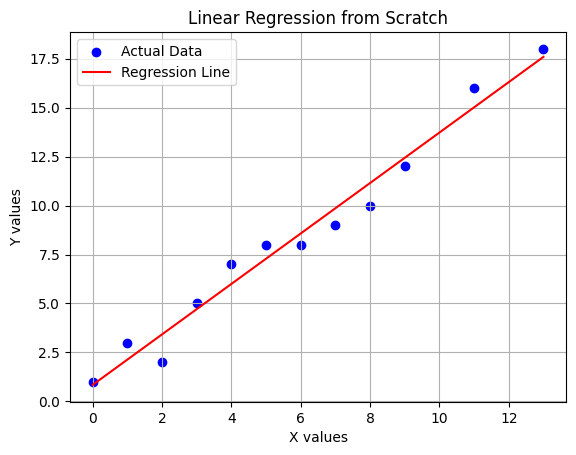

In [11]:
import numpy as np
import matplotlib.pyplot as plt
x = np.array([0,1,2,3,4,5,6,7,8,9,11,13])
y = np.array([1,3,2,5,7,8,8,9,10,12,16,18])

# Mean of x and y
x_mean = np.mean(x)
y_mean = np.mean(y)

# Calculate coefficients
b1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
b0 = y_mean - b1 * x_mean

print("Estimated Coefficients:")
print("b0 (Intercept):", b0)
print("b1 (Slope):", b1)

y_pred = b0 + b1 * x

# Create a scatter plot of the original data
plt.scatter(x, y, color="blue", label="Actual Data")

# Plot the regression line
plt.plot(x, y_pred, color="red", label="Regression Line")

# Add labels and title for clarity
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Linear Regression from Scratch")
plt.legend()
plt.grid(True)


Frequent Itemsets:
   support         itemsets
0    0.750          (bread)
1    0.500         (butter)
2    0.500           (eggs)
3    0.500           (milk)
4    0.375  (butter, bread)
5    0.375    (eggs, bread)
6    0.500    (milk, bread)

Rules:
  antecedents consequents  support  confidence
0    (butter)     (bread)    0.375        0.75
1      (eggs)     (bread)    0.375        0.75
2      (milk)     (bread)    0.500        1.00


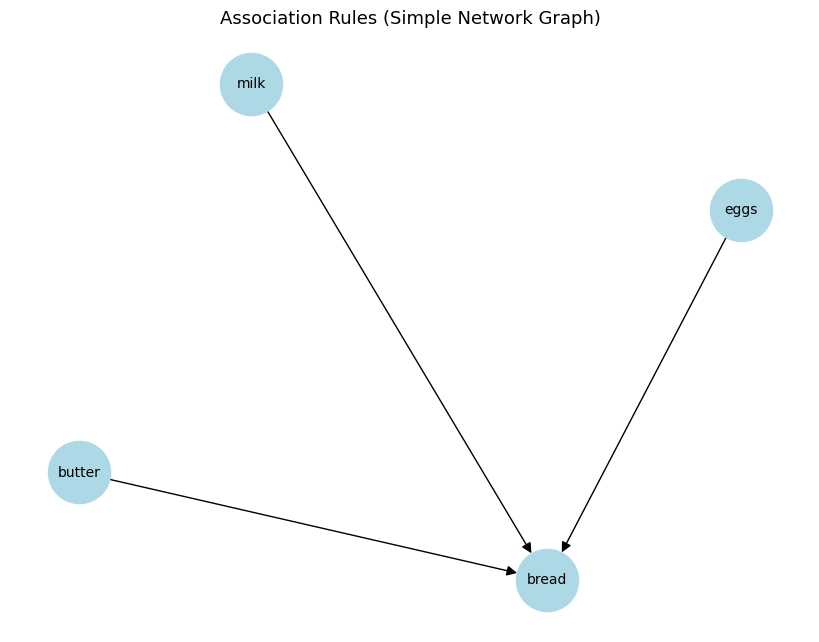

In [ ]:
#slip 14
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Load dataset
df = pd.read_csv("Slip14.csv")

# Split items into lists
transactions = df['Items'].apply(lambda x: x.split(','))

# Encode transactions
te = TransactionEncoder()
data = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(data, columns=te.columns_)

# Find frequent itemsets
freq_items = apriori(df_encoded, min_support=0.3, use_colnames=True)

# Generate rules
rules = association_rules(freq_items, metric="confidence", min_threshold=0.7)

print("Frequent Itemsets:")
print(freq_items)
print("\nRules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence']])

# === Simple Network Plot ===
G = nx.DiGraph()

for _, row in rules.iterrows():
    for a in row['antecedents']:
        for c in row['consequents']:
            G.add_edge(a, c)

plt.figure(figsize=(8, 6))
nx.draw(
    G,
    with_labels=True,
    node_color="lightblue",
    node_size=2000,
    font_size=10,
    arrows=True,
    arrowstyle='-|>',
    arrowsize=15
)
plt.title("Association Rules (Simple Network Graph)", fontsize=13)
plt.show()


C:\Users\admin\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Predicted class for the new show: YES


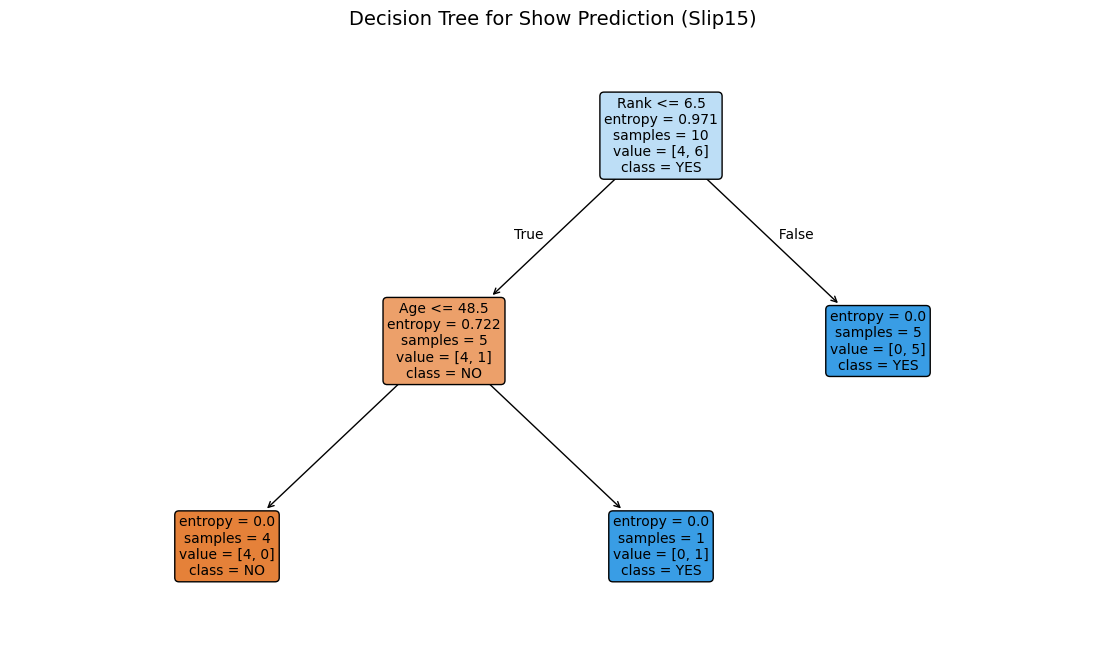

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

# === Load dataset ===
df = pd.read_csv("Slip15.csv")

# Encode the 'Nationality' column
le = LabelEncoder()
df['Nationality'] = le.fit_transform(df['Nationality'])

# Split features and target
X = df[['Age', 'Experience', 'Rank', 'Nationality']]
y = df['Go']

# Train Decision Tree
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X, y)

# === Predict for a new show ===
new_show = [[40, 10, 7, le.transform(['USA'])[0]]]
prediction = clf.predict(new_show)

print("Predicted class for the new show:", prediction[0])


plt.figure(figsize=(14, 8))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=clf.classes_,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree for Show Prediction (Slip15)", fontsize=14)
plt.show()


In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Load data
df = pd.read_csv("Groceries_dataset.csv")

# Prepare transactions
transactions = df['itemDescription'].apply(lambda x: [i.strip() for i in x.split(',')])

# Encode transactions
te = TransactionEncoder()
data = te.fit(transactions.tolist()).transform(transactions.tolist())
df_encoded = pd.DataFrame(data, columns=te.columns_)

# Apriori: find frequent items
freq_items = apriori(df_encoded, min_support=0.05, use_colnames=True)

# Association rules
rules = association_rules(freq_items, metric="confidence", min_threshold=0.7)

# Convert sets to string for readability
rules["antecedents"] = rules["antecedents"].apply(lambda x: ', '.join(list(x)))
rules["consequents"] = rules["consequents"].apply(lambda x: ', '.join(list(x)))

# Print results
print("Frequent Itemsets:\n", freq_items)
print("\nRules:\n", rules[['antecedents','consequents','support','confidence']])


Frequent Itemsets:
    support      itemsets
0  0.064543  (whole milk)

Rules with support and confidence:
Empty DataFrame
Columns: [antecedents, consequents, support, confidence]
Index: []
